In [9]:
#Create Access to my code
import sys
sys.path.insert(1, '../vidr/')

#Import hte vaedr functions we have created
from vidr import VIDR
from utils import *

#Import important modules
import scanpy as sc
import scgen as scg
import pandas as pd
import numpy as np
import torch
import seaborn as sns
from scipy import stats
from scipy import linalg
from scipy import spatial
from anndata import AnnData
from scipy import sparse
from statannotations.Annotator import Annotator
from matplotlib import pyplot as plt

import scvi
sc.set_figure_params(dpi = 150)
sc.settings.figdir = "../figures/"
sns.set_style("dark")

In [10]:
adata = sc.read("../data/kang2018.h5ad")

/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [11]:
#Training model
cell = "B"
train_adata, test_adata = prepare_data(adata, "cell_type", "condition", cell, "stimulated", normalized = True)
model = VIDR(train_adata, linear_decoder = False)
train_adata.obs["cell_dose"] = [f"{j}_{str(i)}" for (i,j) in zip(train_adata.obs["condition"], train_adata.obs["cell_type"])]
#     model.train(
#     max_epochs=100,
#     batch_size=128,
#     early_stopping=True,
#     early_stopping_patience=25)
    
#     model.save(f"../../data/VAE_Binary_Prediction_Dioxin_5000g_{cell}.pt")
vae = model.load(f"../data/VAE_Binary_Prediction_IFNB_7000g_{cell}.pt/", train_adata)

INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


## Supplemental Figure 3 A

In [12]:
#UMAP Projection of latent space
latent_X = vae.get_latent_representation(adata)
latent_adata = sc.AnnData(X=latent_X, obs=adata.obs.copy())
cell_condition = [f"{j}_{str(i)}" for (i,j) in zip(adata.obs["condition"], adata.obs["cell_type"])]
training = ["Train" if i != cell+"_stimulated" else "Test" for i in cell_condition]
latent_adata.obs["Cell_Condition"] = cell_condition
latent_adata.obs["Training Split"] = training

INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16893 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16893 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [13]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cell_Condition' as categorical
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Training Split' as categorical


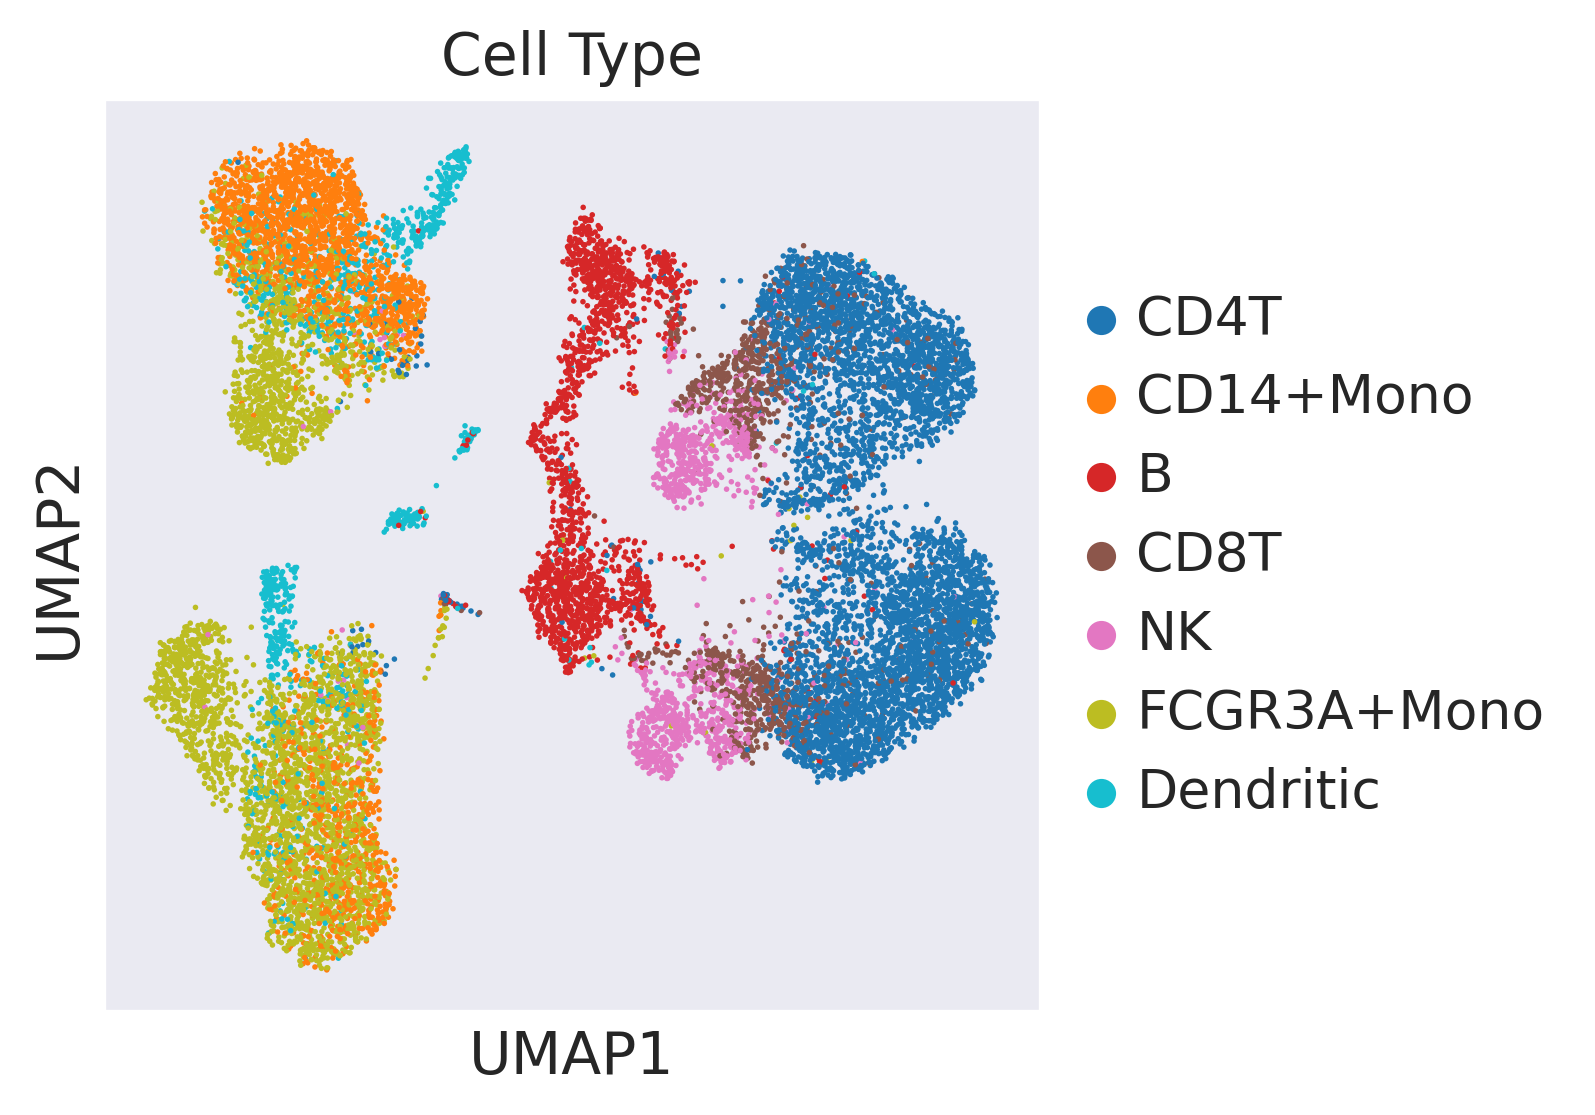

In [14]:
ax = sc.pl.umap(latent_adata, color=['cell_type'], frameon=True,palette = "tab10", save ="S3A1.svg", title = "Cell Type")

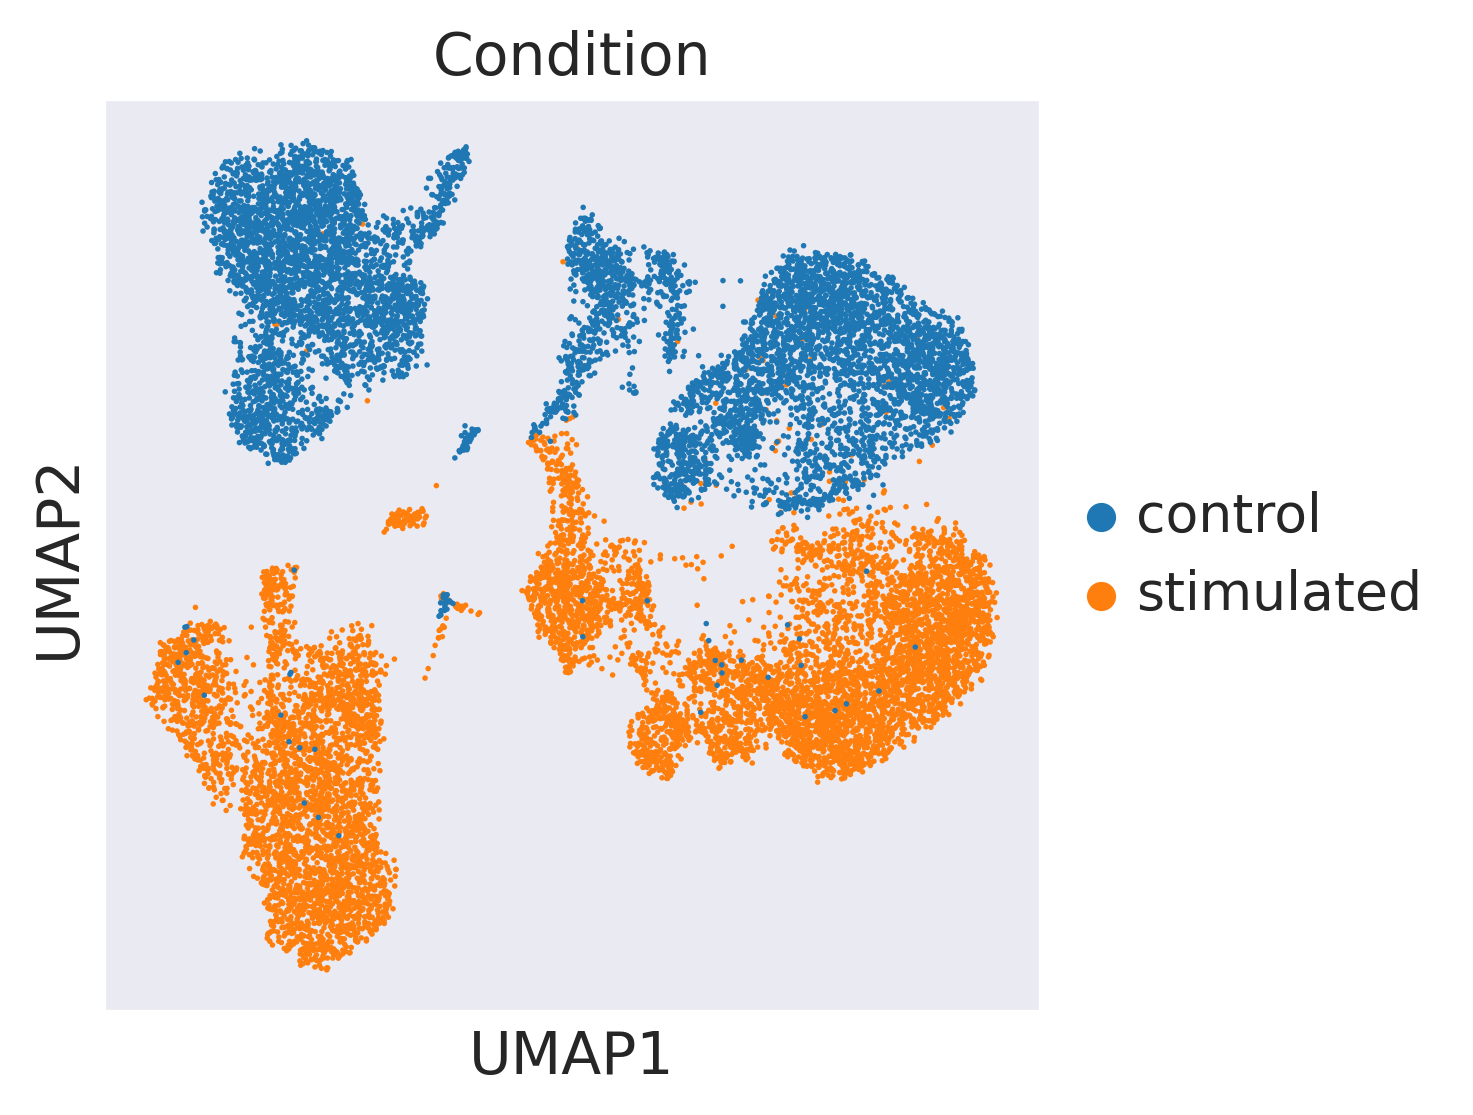

In [15]:
ax = sc.pl.umap(latent_adata, color=['condition'], frameon=True, save ="Sup3A2.svg", title = "Condition")

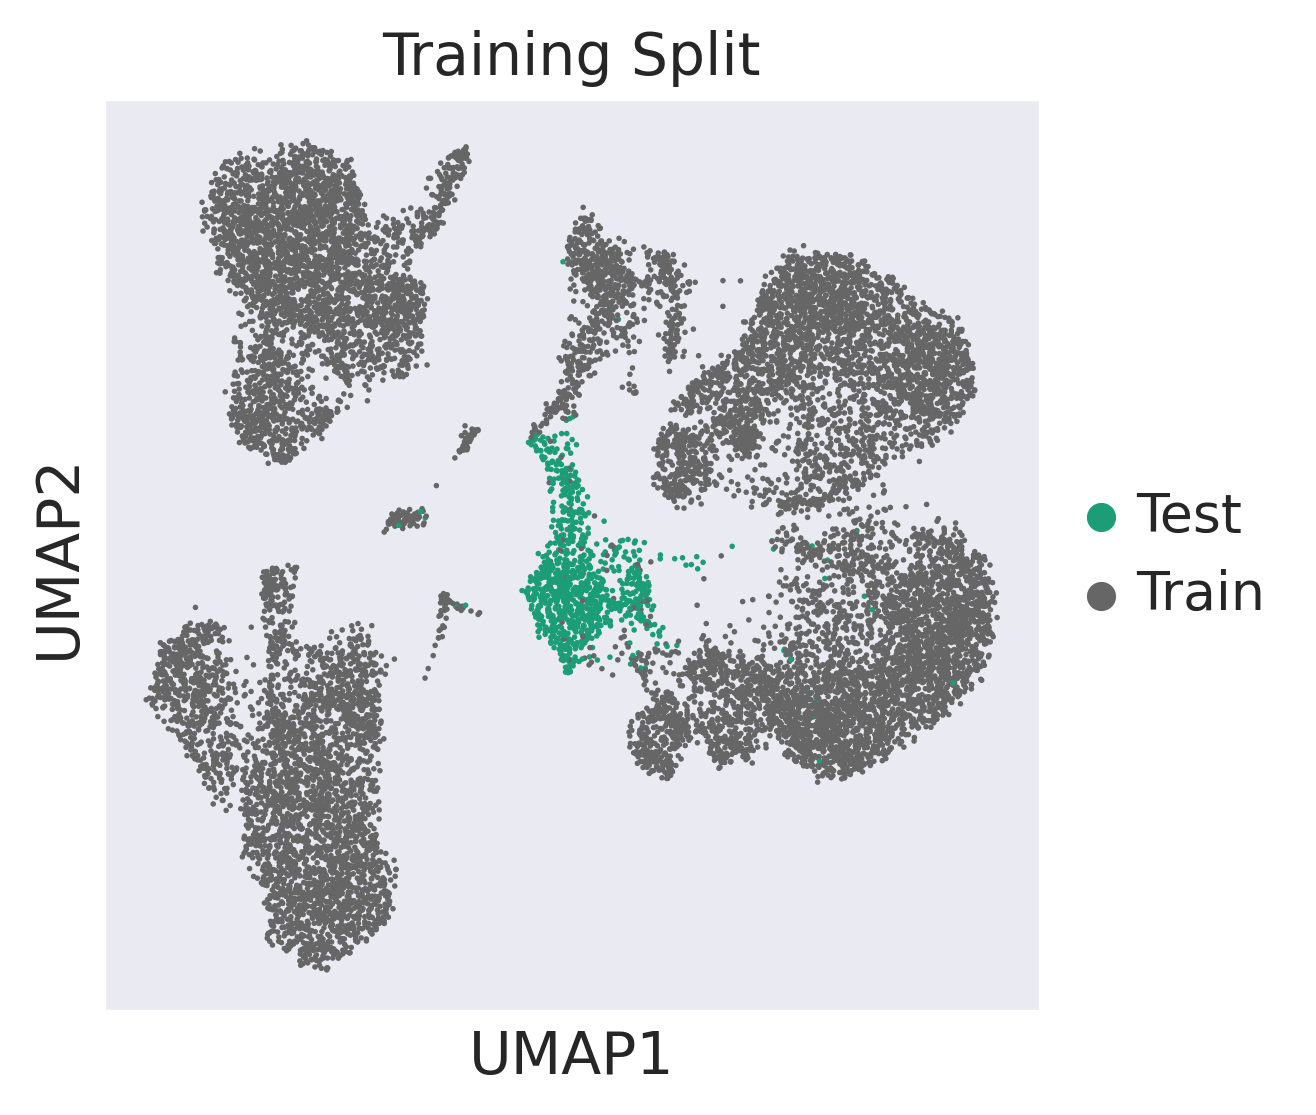

In [16]:
ax = sc.pl.umap(latent_adata, color=['Training Split'], frameon=True,palette="Dark2", save ="S3A3.svg")

# Supplemental Figure 3B

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering ca

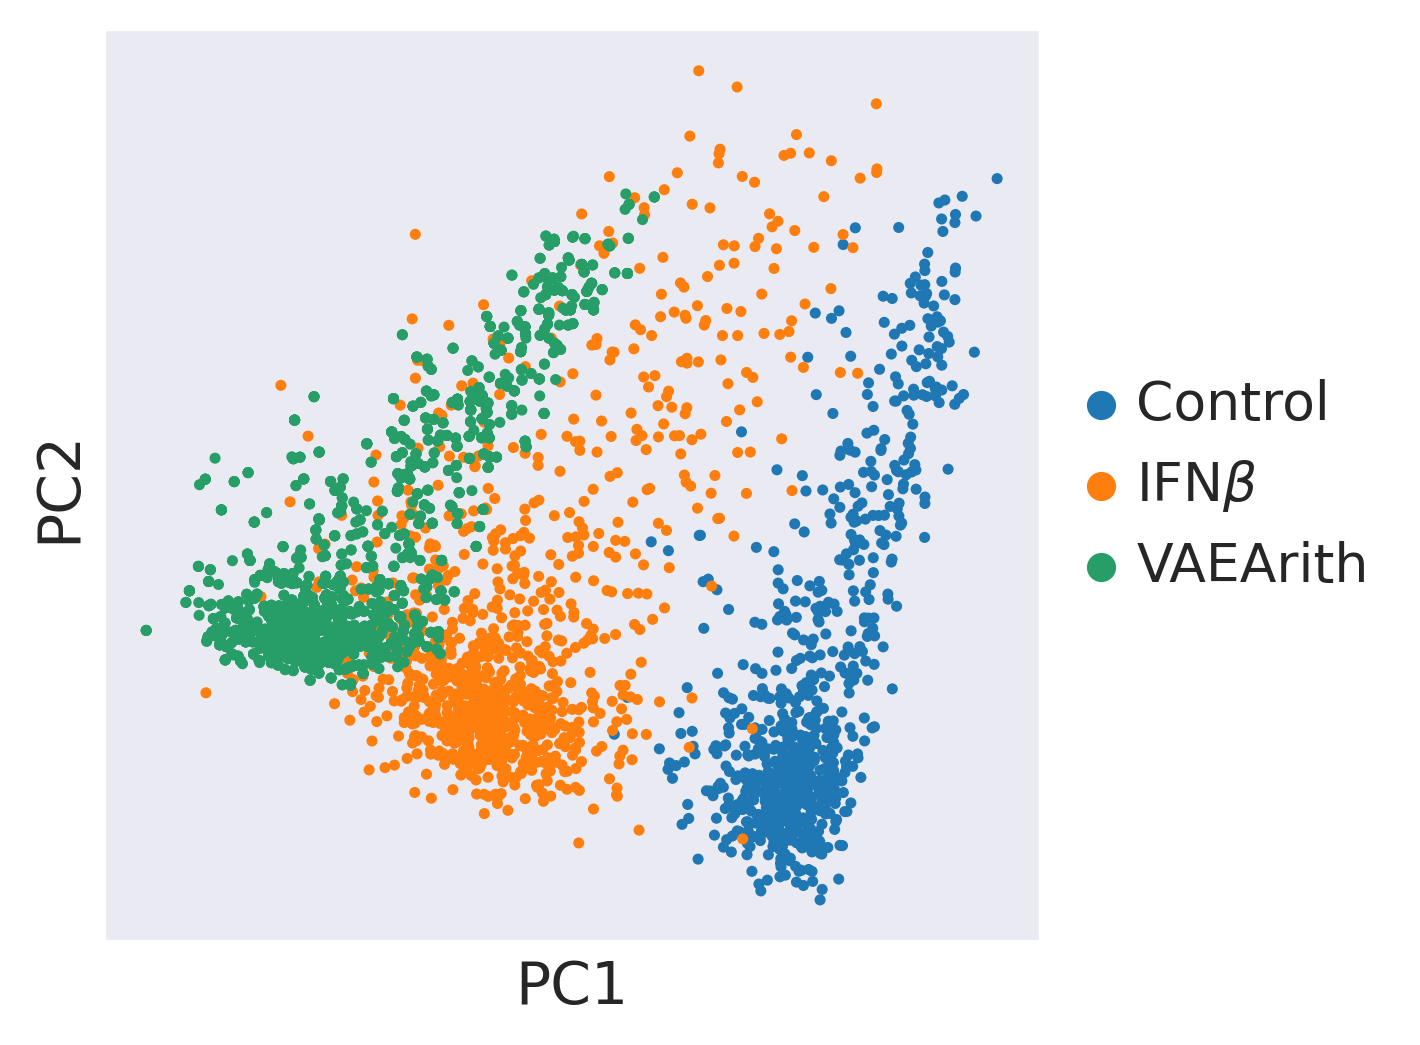

Trying to set attribute `.uns` of view, copying.


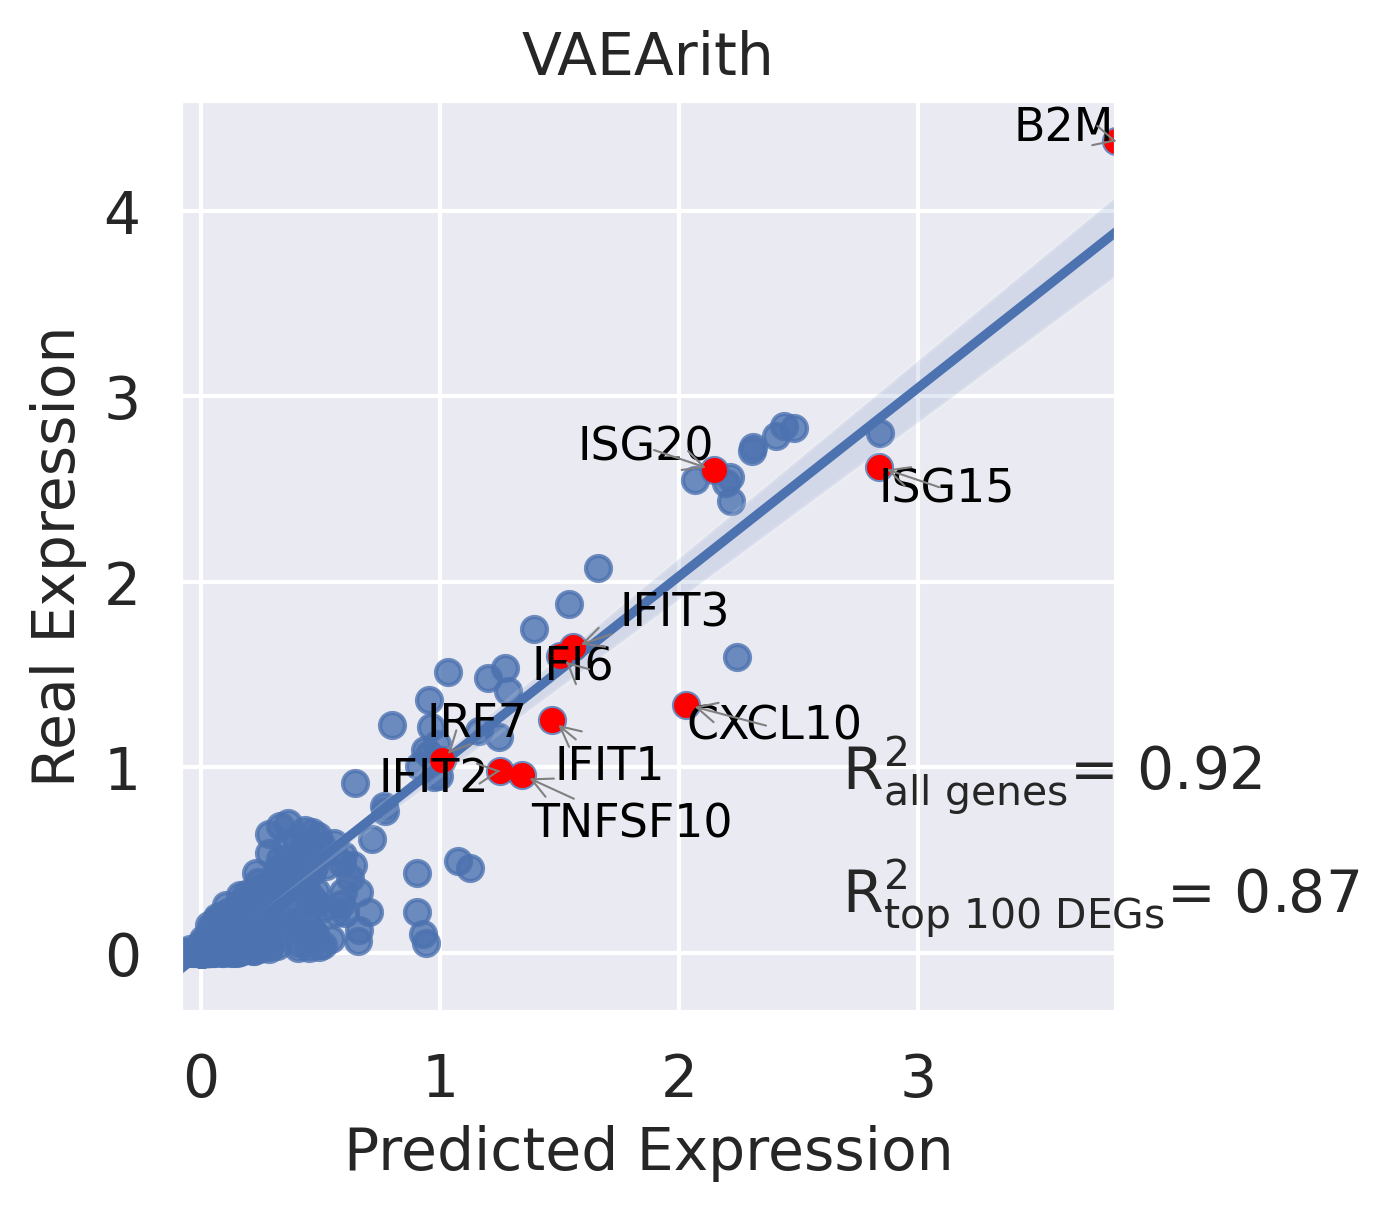

(0.9172625485786251, 0.8659317378695021)


In [17]:
model = vae
pred, delta = model.predict(
ctrl_key="control",
treat_key="stimulated",
cell_type_to_predict=cell,
regression = False)
pred.obs["condition"] = 'pred'
ctrl_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "control"))]
treat_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "stimulated"))]
eval_adata1 = ctrl_adata.concatenate(treat_adata, pred)
treatments = []
for i in eval_adata1.obs["condition"]:
    if i == "control":
        treatments.append("Control")
    elif i == "stimulated":
        treatments.append(r"IFN$\beta$")
    else:
        treatments.append("VAEArith")
eval_adata1.obs["Treatment"] = treatments
sc.tl.pca(eval_adata1)
sc.pl.pca(eval_adata1, color = "Treatment", frameon = True, title = "", save = "sup3B1.svg")
CD4T = adata[adata.obs["cell_type"] ==cell]
sc.tl.rank_genes_groups(CD4T, groupby="condition", method="wilcoxon")
diff_genes = CD4T.uns["rank_genes_groups"]["names"]["stimulated"]
r2_value = model.reg_mean_plot(
eval_adata1,
axis_keys={"x": "pred", "y": r"stimulated"},
gene_list=diff_genes[:10],
top_100_genes = diff_genes[:100],
labels={"x": "Predicted Expression", "y": "Real Expression"},
path_to_save="../figures/S3B1.svg",
show=True,
legend=False, title = "VAEArith")
print(r2_value)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.r

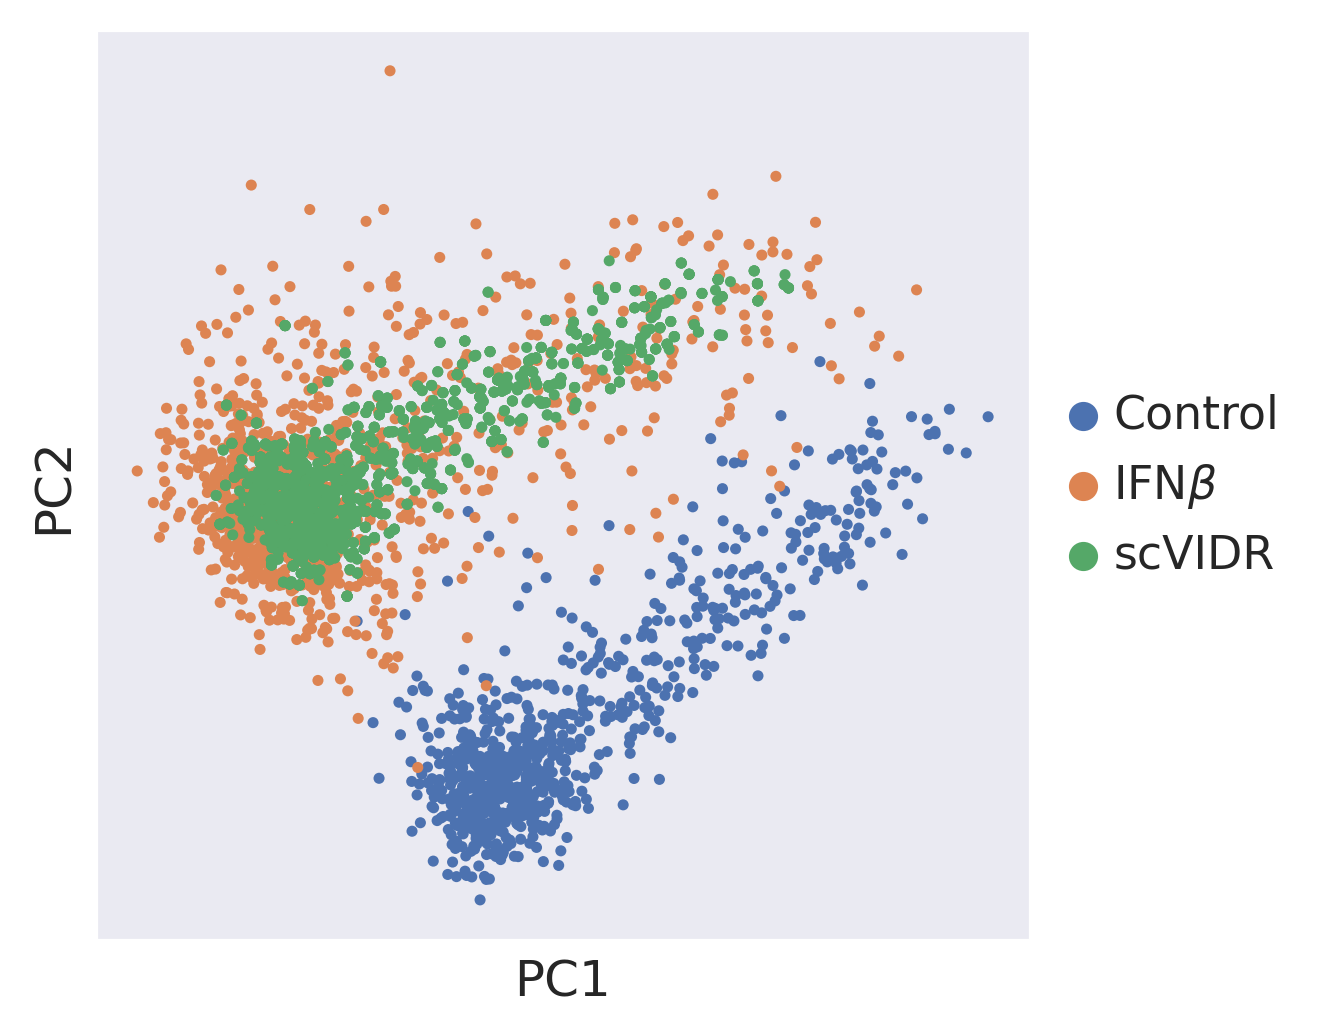

Trying to set attribute `.uns` of view, copying.


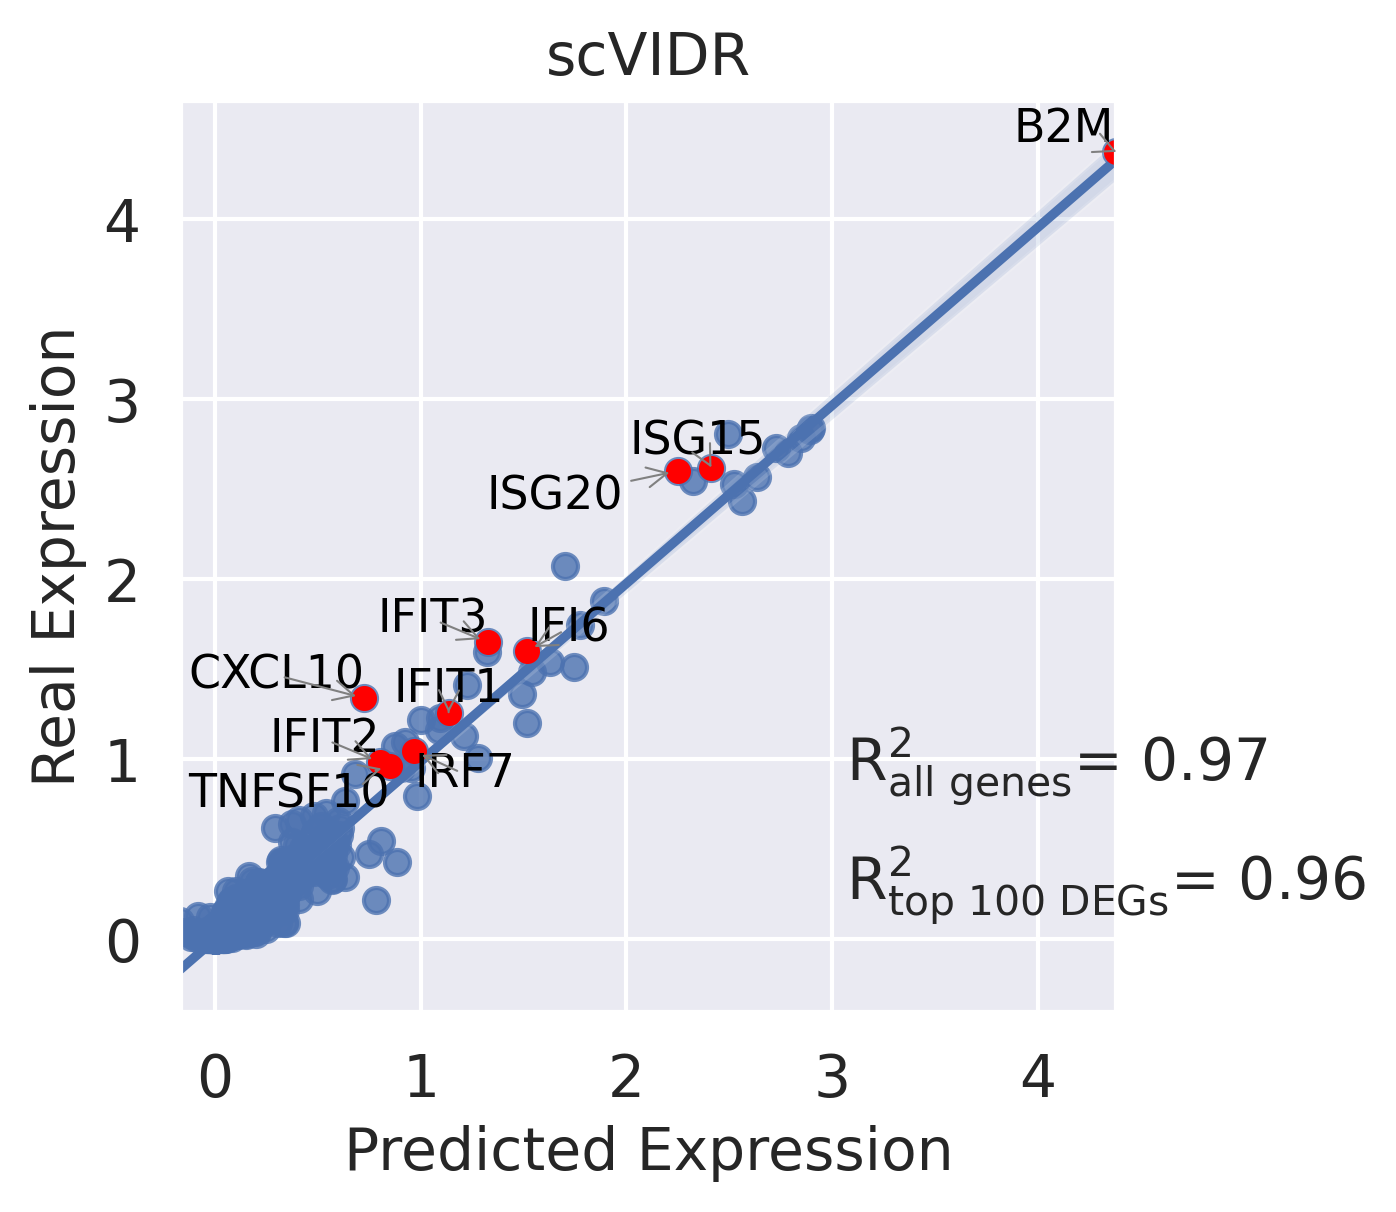

(0.9658647952933983, 0.9605801751642429)


In [18]:
model = vae
pred, delta, reg = model.predict(
ctrl_key="control",
treat_key="stimulated",
cell_type_to_predict=cell,
regression = True)
pred.obs["condition"] = 'pred'
ctrl_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "control"))]
treat_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "stimulated"))]
eval_adata2 = ctrl_adata.concatenate(treat_adata, pred)
treatments = []
for i in eval_adata2.obs["condition"]:
    if i == "control":
        treatments.append("Control")
    elif i == "stimulated":
        treatments.append(r"IFN$\beta$")
    else:
        treatments.append("scVIDR")
eval_adata2.obs["Treatment"] = treatments
sc.tl.pca(eval_adata2)
sc.pl.pca(eval_adata2, color = "Treatment", frameon = True, title = "", save = "sup3C1.svg")
CD4T = adata[adata.obs["cell_type"] ==cell]
sc.tl.rank_genes_groups(CD4T, groupby="condition", method="wilcoxon")
diff_genes = CD4T.uns["rank_genes_groups"]["names"]["stimulated"]
r2_value = model.reg_mean_plot(
eval_adata2,
axis_keys={"x": "pred", "y": r"stimulated"},
gene_list=diff_genes[:10],
top_100_genes = diff_genes[:100],
labels={"x": "Predicted Expression", "y": "Real Expression"},
path_to_save="../figures/S3B2.svg",
show=True,
legend=False, title = "scVIDR")
print(r2_value)

# Supplemental Figure 3C

In [19]:
eval_adata = eval_adata1.concatenate(eval_adata2)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Treatment' as categorical


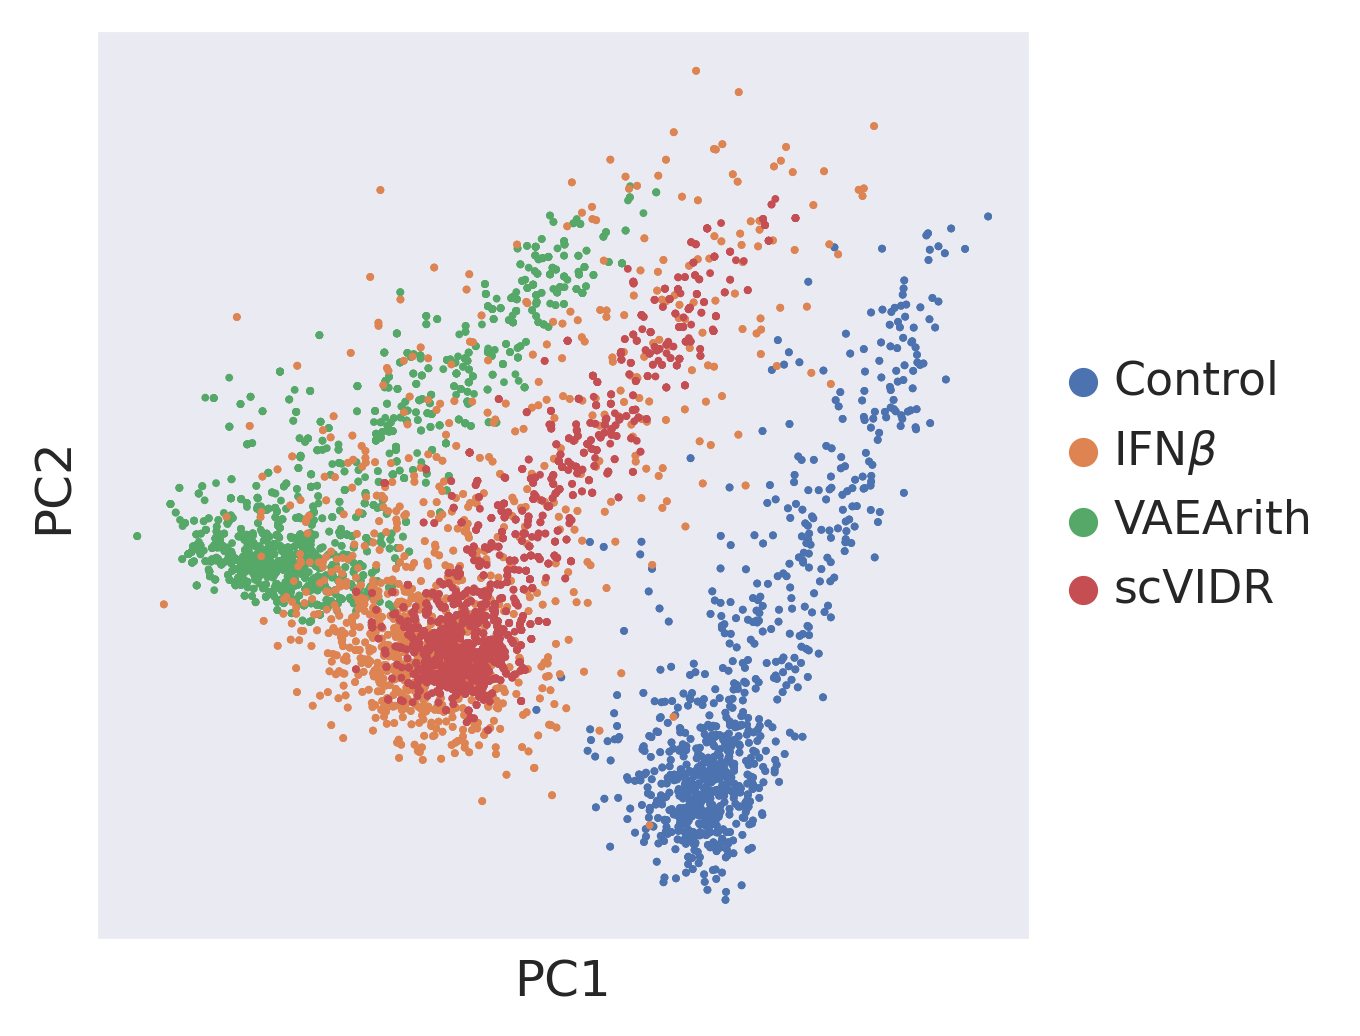

In [20]:
sc.tl.pca(eval_adata)
sc.pl.pca(eval_adata, color = "Treatment", frameon = True, title = "", save = "S3C.svg")

# Supplemental Figure 3E

In [22]:
df_list = []
cell_types = np.unique(adata.obs["cell_type"])
for cell in cell_types:
    print(cell)
    train_adata, test_adata = prepare_data(adata, "cell_type", "condition", cell, "stimulated", normalized = True)

    model = VIDR(train_adata, linear_decoder = False)
#     model.train(
#     max_epochs=100,
#     batch_size=128,
#     early_stopping=True,
#     early_stopping_patience=25)
    
#     model.save(f"../../data/VAE_Binary_Prediction_IFNB_7000g_{cell}.pt")
    model = model.load(f"../data/VAE_Binary_Prediction_IFNB_7000g_{cell}.pt/", train_adata)
    
    model_name = "VAEArith"
    
    pred, delta = model.predict(
    ctrl_key="control",
    treat_key="stimulated",
    cell_type_to_predict=cell,
    regression = False)
    
    pred.obs["condition"] = 'pred'
    ctrl_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "control"))]
    treat_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "stimulated"))]
    eval_adata = ctrl_adata.concatenate(treat_adata, pred)
    
    CD4T = adata[adata.obs["cell_type"] ==cell]
    sc.tl.rank_genes_groups(CD4T, groupby="condition", method="wilcoxon")
    diff_genes = CD4T.uns["rank_genes_groups"]["names"]["stimulated"]
    
    r2_df = calculate_r2_singledose(
        eval_adata, cell,
        model_name, 
        "condition", 
        {"x":"pred", "y":"stimulated"}, 
        diff_genes=diff_genes[:100], 
        random_sample_coef = 0.8,
        n_iter = 500
    )
    df_list.append(r2_df)

B
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None
INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


None


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


CD14+Mono
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


CD4T
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2109 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2109 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 15006 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15006 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 15006 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15006 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


CD8T
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


None
INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


Dendritic
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


FCGR3A+Mono
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


NK
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 17059 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


In [25]:
cell_types = np.unique(adata.obs["cell_type"])
for cell in cell_types:
    print(cell)
    train_adata, test_adata = prepare_data(adata, "cell_type", "condition", cell, "stimulated", normalized = True)

    model = VIDR(train_adata, linear_decoder = False)
#     model.train(
#     max_epochs=100,
#     batch_size=128,
#     early_stopping=True,
#     early_stopping_patience=25)
    
#     model.save(f"../../data/VAE_Binary_Prediction_IFNB_7000g_{cell}.pt")
    model = model.load(f"../data/VAE_Binary_Prediction_IFNB_7000g_{cell}.pt/", train_adata)
    
    model_name = "scVIDR"
    
    pred, delta, reg = model.predict(
    ctrl_key="control",
    treat_key="stimulated",
    cell_type_to_predict=cell,
    regression = True)
    
    pred.obs["condition"] = 'pred'
    ctrl_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "control"))]
    treat_adata = adata[((adata.obs['cell_type'] == cell) & (adata.obs["condition"] == "stimulated"))]
    eval_adata = ctrl_adata.concatenate(treat_adata, pred)
    
    CD4T = adata[adata.obs["cell_type"] ==cell]
    sc.tl.rank_genes_groups(CD4T, groupby="condition", method="wilcoxon")
    diff_genes = CD4T.uns["rank_genes_groups"]["names"]["stimulated"]
    
    r2_df = calculate_r2_singledose(
        eval_adata, cell,
        model_name, 
        "condition", 
        {"x":"pred", "y":"stimulated"}, 
        diff_genes=diff_genes[:100], 
        random_sample_coef = 0.8,
        n_iter = 500
    )
    df_list.append(r2_df)

B
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 15900 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


CD14+Mono
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16278 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


None


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


CD4T
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 13766 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2138 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2138 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 30012 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 30012 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


CD8T
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16352 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


Dendritic
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16430 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


FCGR3A+Mono
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 14392 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


NK
INFO     Using batches from adata.obs["condition"]                                           


INFO:scvi.data._anndata:Using batches from adata.obs["condition"]


INFO     Using labels from adata.obs["cell_type"]                                            


INFO:scvi.data._anndata:Using labels from adata.obs["cell_type"]


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Please do not further modify adata until model is trained.                          


INFO:scvi.data._anndata:Please do not further modify adata until model is trained.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 16247 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


None


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Received view of anndata, making copy.                                              


INFO:scvi.model.base._base_model:Received view of anndata, making copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 2437 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Input adata not setup with scvi. attempting to transfer anndata setup               


/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
INFO:scvi.model.base._base_model:Input adata not setup with scvi. attempting to transfer anndata setup


INFO     Using data from adata.X                                                             


INFO:scvi.data._anndata:Using data from adata.X


INFO     Computing library size prior per batch                                              


INFO:scvi.data._anndata:Computing library size prior per batch


INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']


INFO     Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches,
         7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              


INFO:scvi.data._anndata:Successfully registered anndata object containing 34118 cells, 6998 vars, 2 batches, 7 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.
/mnt/home/kanaomar/miniconda3/lib/python3.9/site-packages/scvi/model/base/_base_model.py:147: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


In [26]:
r2_values_allCells_df = pd.concat(df_list)

In [27]:
r2_values_allCells_df.to_csv("../data/IFNB_Model_Results.csv")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

scVIDR_All HVGs vs. VAEArith_All HVGs: Mann-Whitney-Wilcoxon test greater, P_val:0.000e+00 U_stat=1.222e+07
scVIDR_DEGs vs. VAEArith_DEGs: Mann-Whitney-Wilcoxon test greater, P_val:0.000e+00 U_stat=1.224e+07


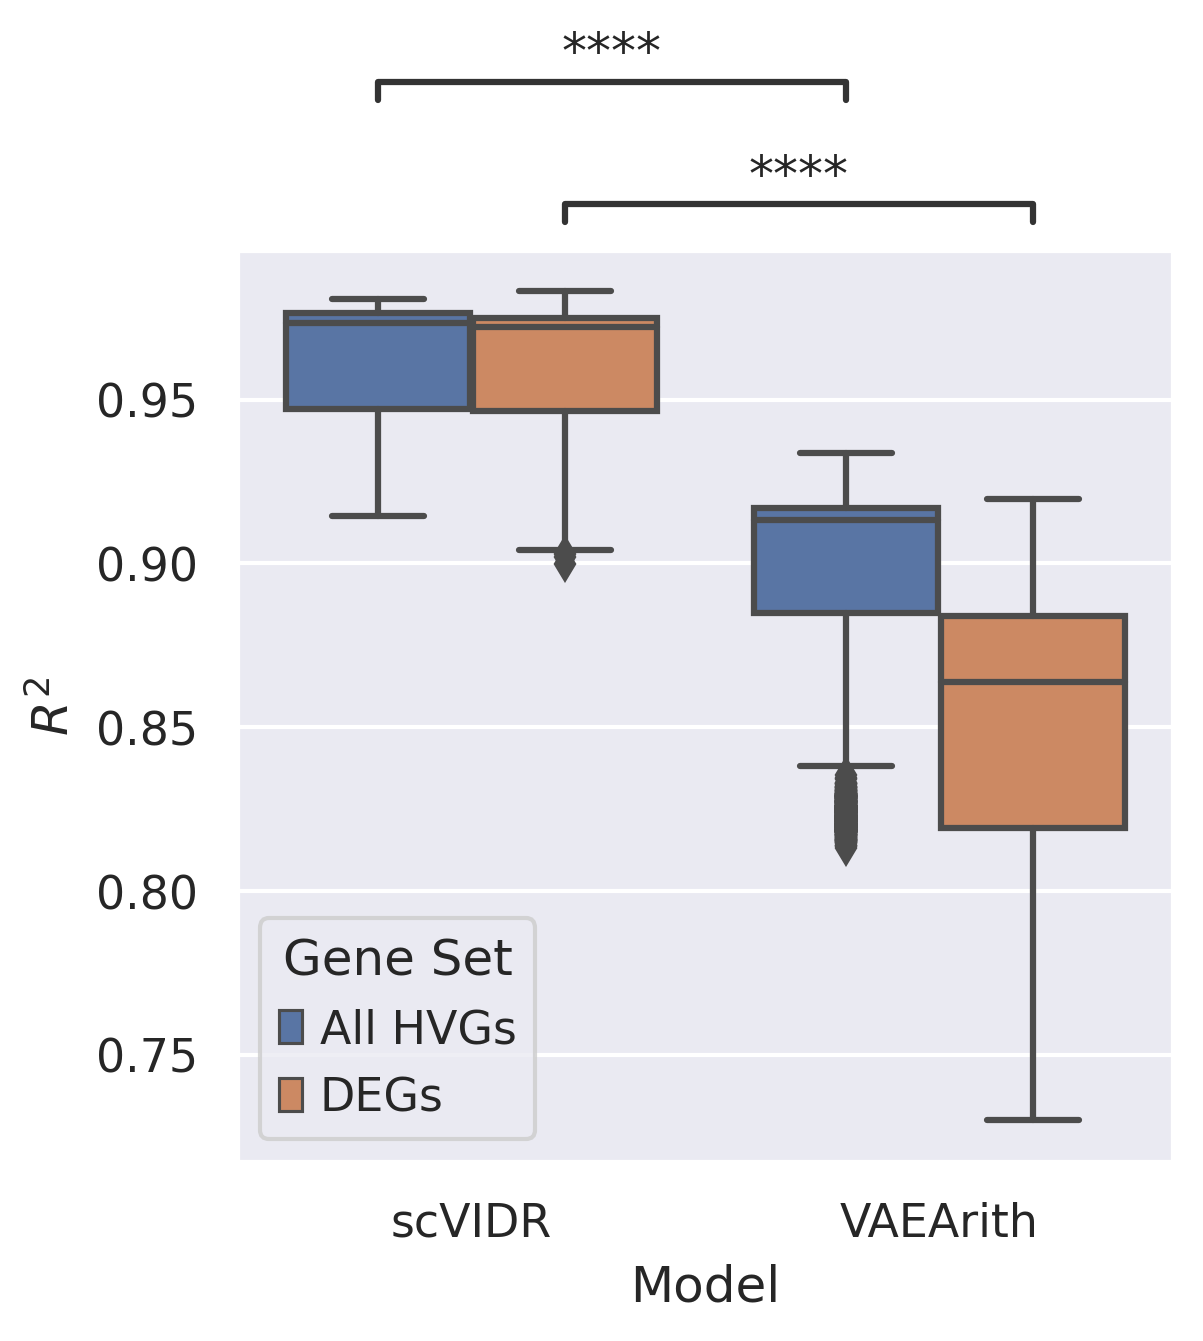

In [29]:
order = ['scVIDR', 'VAEArith']
hue_order = ["All HVGs", "DEGs"]
ax = sns.boxplot(x = "Model", y = "R^2",  data = r2_values_allCells_df, hue = "Gene Set", order = order, hue_order = hue_order)
pairs = [
    (('scVIDR','All HVGs'), ('VAEArith', 'All HVGs')),
    (('scVIDR','DEGs'), ('VAEArith', 'DEGs'))
]
annotator = Annotator(ax, pairs, data=r2_values_allCells_df, x="Model", y="R^2", hue = "Gene Set", order = order)
annotator.configure(test='Mann-Whitney-gt', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.ylabel(r"$R^2$")
plt.savefig("../figures/S3E.svg", bbox_inches = "tight")
plt.show()